In [1]:
%pylab inline
import random
from collections import defaultdict
pylab.rcParams['figure.figsize'] = 12, 5

Populating the interactive namespace from numpy and matplotlib


#Aufgabenblatt 4
## 1. First Passage Time

Code für Random-Walk:

In [2]:
def randomWalk(L, reflect, maxsteps):
    x, y = 0, 0
    t = 0
    while t < maxsteps:
        if x == y and x > 0:
            return t, x
        if bool(random.getrandbits(1)):
            if bool(random.getrandbits(1)):
                x += 1
            else:
                x -= 1
        else:
            if bool(random.getrandbits(1)):
                y += 1
            else:
                y -= 1
        
        if reflect: #Reflektierender Rand(?)
            if x < 0:
                x = 1
            if x >= L:
                x = L - 2
            if y < 0:
                y = 1
            if y >= L:
                y = L - 2
        else: #Periodischer rand...
            x = x % L
            y = y % L

        t += 1
    return t, None

**a.)** Bestimmen Sie die First Passage Time $t_1(n)$ fü das Eintreffen am jeweiligen Reaktionszentrum mit Koordinate $(x, y)_n$.

In [3]:
%%time
maxsteps = 30000
L = 10

results = {}
for reflect in [True, False]:
    #Summiere die Zeitschritte für das Erreichen eines Reaktionszentrums auf
    stepSum = np.zeros(L - 1, dtype=np.int32)
    #Und zähle, wie oft es erreicht wird
    count = np.zeros(L - 1, dtype=np.int32)
    steps =  defaultdict(list)
    results[reflect] = {'stepSum':stepSum, 'count':count, 'steps': steps}
    
    #Solange bis wir jedes Reaktionszentrums mindestens ... mal erreicht haben...
    while np.any(count < 300):
        #Nach t schritten bei Reaktionszentrum p
        t, p = randomWalk(L, reflect, maxsteps)
        count[p - 1] += 1
        stepSum[p - 1] += t
        steps[p].append(t)

Wall time: 29.5 s


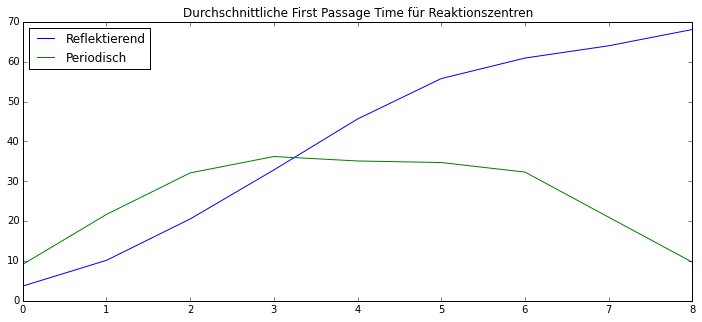

In [4]:
pylab.title("Durchschnittliche First Passage Time für Reaktionszentren")
for reflect in [True, False]:
    pylab.plot(np.divide(results[reflect]['stepSum'],results[reflect]['count']), label = "Reflektierend" if reflect else "Periodisch")
_ = pylab.legend(loc='upper left')

**b..)** Bestimmen Sie die Verteilungsfunktion (Häufigkeitsfuntkion) $$f(x,y,t_1(n)|x_0,y_0,0)dt_1$$ den Ort $(x,y)$ zu einer Zeit $t$ zu erreichen

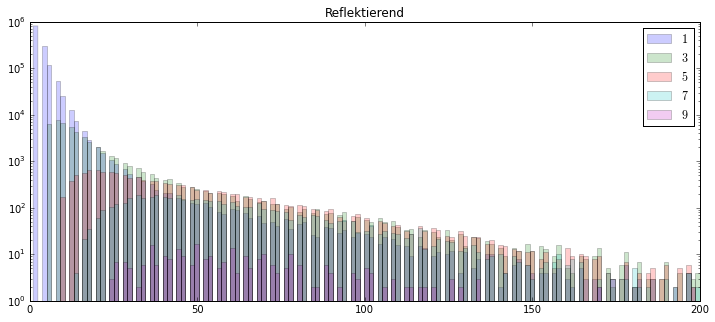

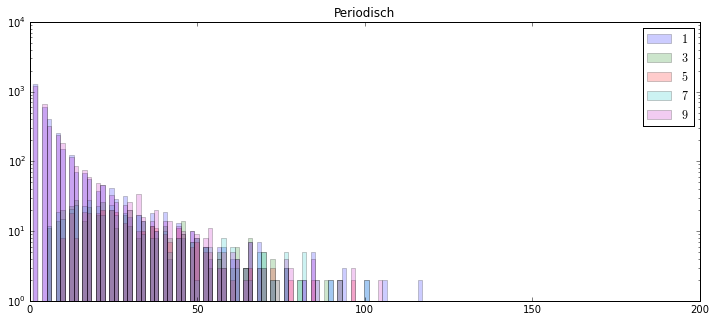

In [5]:
bins = numpy.linspace(1, 200, 150)
for reflect in [True, False]:
    pylab.title("Reflektierend" if reflect else "Periodisch")
    for r, steps in list(results[reflect]['steps'].items())[::2]:
        pylab.hist(steps, bins, label="${}$".format(r), alpha=0.2)
    pyplot.yscale('log')
    pylab.legend()
    pylab.show()

### In 3D

In [6]:
def randomWalk3D(L, reflect, maxsteps):
    pos = np.zeros(3)
    t = 0
    while t < maxsteps:
        if pos[0] == pos[1] and pos[1] == pos[2] and pos[0] > 0:
            return t, pos[0]
        direction = random.choice([0,1,2])
        if bool(random.getrandbits(1)):
            pos[direction] += 1
        else:
            pos[direction] -= 1
        
        if reflect: #Reflektierender Rand(?)
            pos[pos < 0] = 1
            pos[pos >= L] = L -2
        else: #Periodischer rand...
            pos = pos % L
        t += 1
    return t, None

In [7]:
%%time
#Identischer Code wie oben, nur mit randomWalk3D anstatt randomWalk
L = 10
results = {}
for reflect in [True, False]:
    #Summiere die Zeitschritte für das Erreichen eines Reaktionszentrums auf
    stepSum = np.zeros(L - 1, dtype=np.int32)
    #Und zähle, wie oft es erreicht wird
    count = np.zeros(L - 1, dtype=np.int32)
    steps =  defaultdict(list)
    results[reflect] = {'stepSum':stepSum, 'count':count, 'steps': steps}
    
    #Solange bis wir jedes Reaktionszentrums mindestens ... mal erreicht haben...
    while np.any(count < 100):
        #Nach t schritten bei Reaktionszentrum p
        t, p = randomWalk3D(L, reflect, maxsteps)
        count[p - 1] += 1
        stepSum[p - 1] += t
        steps[p].append(t)

Wall time: 53.6 s


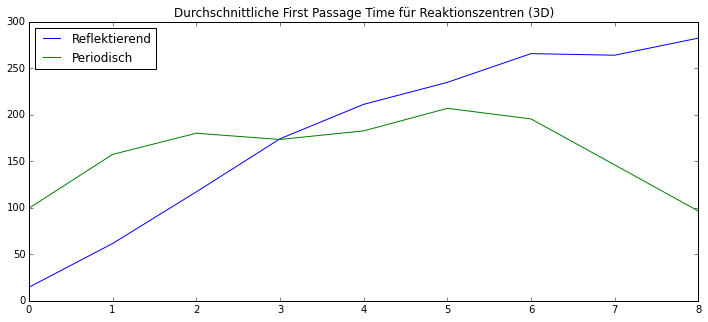

In [8]:
pylab.title("Durchschnittliche First Passage Time für Reaktionszentren (3D)")
for reflect in [True, False]:
    pylab.plot(np.divide(results[reflect]['stepSum'],results[reflect]['count']), label = "Reflektierend" if reflect else "Periodisch")
_ = pylab.legend(loc='upper left')

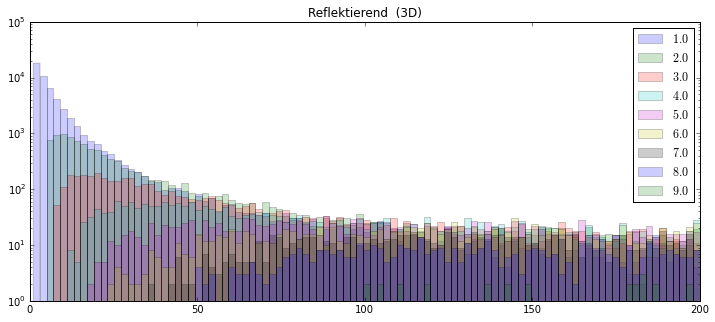

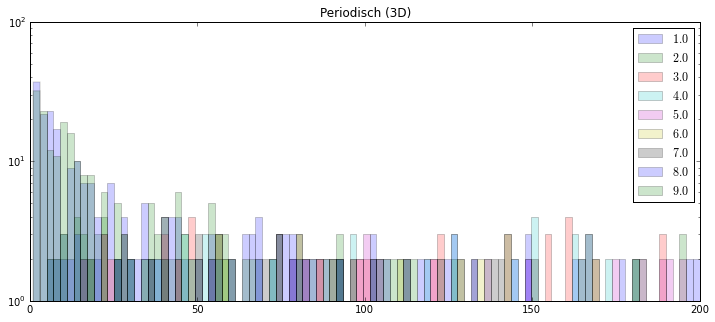

In [9]:

bins = numpy.linspace(1, 200, 100)
for reflect in [True, False]:
    pylab.title("Reflektierend  (3D)" if reflect else "Periodisch (3D)")
    for r, steps in list(results[reflect]['steps'].items()):
        pylab.hist(steps, bins, label="${}$".format(r), alpha=0.2)
    pyplot.yscale('log')
    pylab.legend()
    pylab.show()

## 2. Self Avoiding Random Walk

In [10]:
def sarw(maxsteps):
    visitedPoints = set()
    richtung = position = random.choice([(1,0), (-1, 0), (0, 1), (0, -1)])
    richtungen = set([(1,0), (-1, 0), (0, 1), (0, -1)])
    for i in range(maxsteps):
        r = random.choice([-1, 0, 1])
        if r != 0:
            #(x,y) um 90° gedreht ist (-y,x) bzw (y,-x)
            richtung = (r*richtung[1], -r*richtung[0])
        position = (position[0] + richtung[0], position[1] + richtung[1])
        if position in visitedPoints:
            return i, position[0]**2 + position[1]**2
        visitedPoints.add(position)
    print("Warning")
    return maxsteps

In [11]:
%%time
Ns = np.empty(10**6, dtype=np.int32)
Rs = np.empty(10**6, dtype=np.int32)
for i in range(10**6):
    Ns[i], Rs[i] = sarw(10000)

Wall time: 37.5 s


**a.)** Wie groß ist die mittlere Länge N einer Kette?

In [12]:
print("Mittlere Länge der Kette: {}".format(Ns.mean()))

Mittlere Länge der Kette: 14.105377


**b.)** Wie sieht die Verteilungsfunktion $p(N)$ für die Längen aus

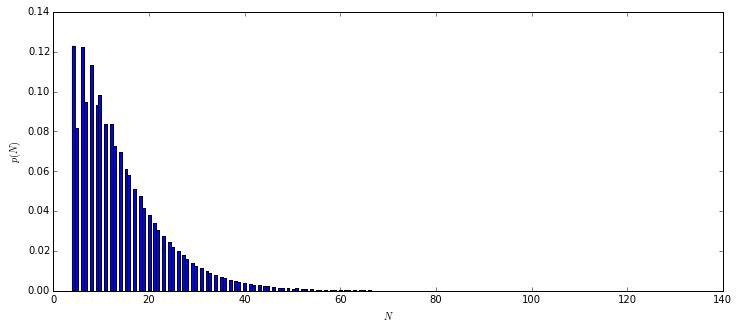

In [13]:
pylab.ylabel("$p(N)$")
pylab.xlabel("$N$")
_ = pylab.hist(Ns, bins=200, normed=True)


***Aus mir noch unerklärlichen Gründen hat das Histogramm "Löcher"!***
$\Rightarrow$ Einige Längen werden nicht angenommen??

In [14]:
print("Mittleres Abstandsquadrat: {}".format(Rs.mean()))

Mittleres Abstandsquadrat: 33.306209


In [15]:
#TODO Vergleich mit normalen Random-Walk

### Survival Biasing

In [16]:
def sarwSurvival(maxsteps):
    visitedPoints = set()
    position = (0, 0)
    for i in range(maxsteps):
        richtungen = set([(1 + position[0],0+ position[1]), 
                          (-1 + position[0], 0 + position[1]),
                          (0 + position[0], 1 + position[1]), 
                          (0 + position[0], -1 + position[1])])
        richtungen -= visitedPoints
        if len(richtungen) == 0:
            return i, position[0]**2 + position[1]**2
        visitedPoints.add(position)

        position = random.choice(list(richtungen)) 
    print("Warning")
    return maxsteps

In [17]:
%%time
Ns2 = np.empty(10**5, dtype=np.int32)
Rs2 = np.empty(10**5, dtype=np.int32)
for i in range(10**5):
    Ns2[i], Rs2[i] = sarwSurvival(10000)

Wall time: 38.4 s


SARW
Mittlere Länge der Kette: 14.105377
Mittleres Abstandsquadrat: 33.306209
SARW+Survival Biasing
Mittlere Länge der Kette: 70.85805
Mittleres Abstandsquadrat: 224.74999


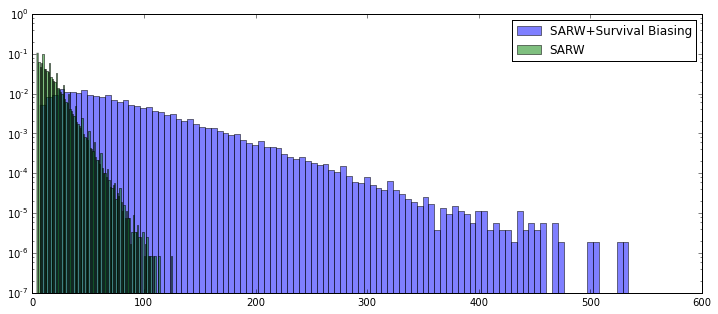

In [18]:
pylab.hist(Ns2, bins=100, normed=True, label="SARW+Survival Biasing", alpha=0.5)
pylab.hist(Ns, bins=100, normed=True, label="SARW", alpha=0.5)
pylab.yscale('log')
pylab.legend()
print("SARW")
print("Mittlere Länge der Kette: {}".format(Ns.mean()))
print("Mittleres Abstandsquadrat: {}".format(Rs.mean()))
print("SARW+Survival Biasing")
print("Mittlere Länge der Kette: {}".format(Ns2.mean()))
print("Mittleres Abstandsquadrat: {}".format(Rs2.mean()))

**c.)** Vergleichen Sie die Ergebnisse mit denen aus dem einfachen SARW.

Der Survival Biased Random Walk läuft sehr viel weiter als ein *normaler* Self avoiding Random Walk

**d.)** Führen Sie die Rechnungen ebenfalls für ein Dreiecksgitter durch.

#TODO